In [1]:
# import tarfile
import dataset

# # tar_path = 'data/datapack2.0train.tar'
# # tar = tarfile.open(tar_path)

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import sklearn
import matplotlib.pyplot as plt

In [3]:
x = dataset.GG2('gg2/')

In [6]:
len(x)

99991

In [7]:
'Testing with one image'

'Testing with one image'

In [8]:
images, labels = x[430]

In [45]:
print(x[430][0][0].shape)
x[430][0][1].shape

torch.Size([1, 200, 200])


torch.Size([3, 66, 66])

In [46]:
x[430]

((tensor([[[-0.0183, -0.0074,  0.0191,  ..., -0.0146,  0.0271,  0.0048],
           [ 0.0339,  0.0269,  0.0268,  ..., -0.0005, -0.0149, -0.0475],
           [ 0.0246,  0.0070,  0.0365,  ..., -0.0091, -0.0260, -0.0109],
           ...,
           [ 0.0111, -0.0079,  0.0060,  ..., -0.0101, -0.0370, -0.0104],
           [-0.0014, -0.0239,  0.0074,  ..., -0.0260,  0.0127, -0.0474],
           [ 0.0023, -0.0122, -0.0047,  ...,  0.0159,  0.0070,  0.0093]]]),
  tensor([[[-8.1442e-03, -2.2611e-03,  8.7684e-03,  ...,  2.3474e-02,
             1.8117e-03, -8.8035e-03],
           [-3.0340e-02,  5.3103e-03, -4.7858e-03,  ..., -2.6846e-03,
            -2.1910e-02, -2.6899e-03],
           [-1.2357e-02,  8.9421e-03, -2.1814e-02,  ...,  1.0689e-03,
             1.3481e-02,  6.7387e-03],
           ...,
           [-2.7516e-02,  1.0252e-02,  3.3616e-03,  ...,  1.6662e-02,
             2.1250e-02, -2.0458e-02],
           [ 1.4997e-02,  1.7283e-02,  6.7349e-03,  ...,  1.4526e-02,
             1.7452e-

In [120]:
print([x ** 2 for x in range(5) if x % 2 == 0])
[labels['n_sources'] for images, labels in [x[i] for i in range(5)]]

[0, 4, 16]


[1.0, 1.0, 0.0, 1.0, 1.0]

In [203]:
vis, others = images
print(vis.shape)
print(others.shape)
print([4, 200, 200]) #what we need

torch.Size([1, 200, 200])
torch.Size([3, 66, 66])
[4, 200, 200]


label: 1.0


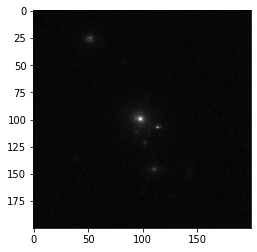

In [206]:

plt.imshow(vis.squeeze(), cmap = 'gray')
print('label:', labels['n_sources'])

In [ ]:
others_scaled = upsample(others[None])

In [ ]:
#list(zip(*[[1, 2, 3], [3, 4, 5], ['a', 'b', 'c']]))

# list(zip(*[
#     sorted([x for x in tar.getnames() if '.fits' in x and band in x])
#     for band in ("EUC_VIS", "EUC_J", "EUC_Y", "EUC_H")
# ]))

In [ ]:
others_scaled = upsample(others[None])
others_scaled.shape

In [ ]:
combined = torch.cat([vis[None], others_scaled], dim=1)
combined.shape

In [ ]:
model(combined)

In [ ]:
#pred = model(vis[None].repeat(1, 3, 1, 1)).argmax().item()
pred = model(combined).argmax().item()

In [ ]:
'Testing with a sample size of 500 images'

In [10]:
sample_size = 500
img = []
lblfull = []
for i in range(sample_size):
    image, label = x[i]
    img.append(image)
    lblfull.append(label)

In [11]:
lbl = []
for i in range(sample_size):
    labeln = lblfull[i]['n_sources']
    lbl.append(labeln)
lbl = torch.tensor(lbl, dtype = torch.int32) # convert labels to tensor with integers
lbl.bincount()#unbalanced

tensor([ 58, 442])

In [12]:
gray = []
color = []
for i in range(sample_size):
    gray_img, color_img = img[i]
    gray.append(gray_img)
    color.append(color_img)
gray = torch.stack(gray)
color = torch.stack(color)
print(gray.shape)
print(color.shape)
print([sample_size, 4, 200, 200]) #what we need

torch.Size([500, 1, 200, 200])
torch.Size([500, 3, 66, 66])
[500, 4, 200, 200]


In [13]:
upsample = torch.nn.Upsample(size = (200,200), mode='bilinear', align_corners=True)
clr_scld = upsample(color)
print(clr_scld.shape)

torch.Size([500, 3, 200, 200])


In [14]:
data = torch.cat([gray, clr_scld], dim=1)
data.shape

torch.Size([500, 4, 200, 200])

In [25]:
model = torch.hub.load('rwightman/gen-efficientnet-pytorch', 'efficientnet_b0', pretrained=True)

Using cache found in /home/mario/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


In [26]:
model.conv_stem = torch.nn.Conv2d(4, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
model.classifier = torch.nn.Linear(1280, 1)
print(model)

GenEfficientNet(
  (conv_stem): Conv2d(4, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): SwishJit()
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): SwishJit()
        (se): SqueezeExcite(
          (avg_pool): AdaptiveAvgPool2d(output_size=1)
          (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (act1): SwishJit()
          (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
        )
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): Identity

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


labels: tensor([1, 0, 0, 0, 1], dtype=torch.int32)


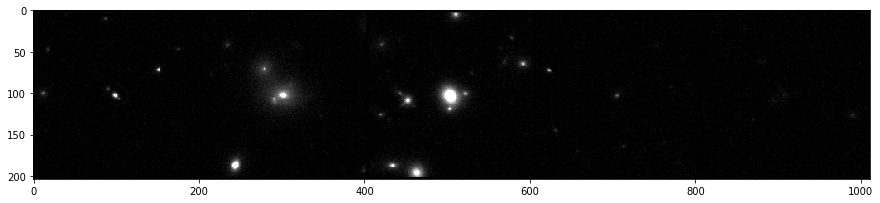

In [27]:
import numpy as np
indices = np.random.choice(range(len(lbl)), 5, p=np.where(lbl == 1, 0.5 / sum(lbl == 1).item(), 0.5 / sum(lbl == 0).item()))
batch = data[indices]
grid = torchvision.utils.make_grid(batch[0:10, 0:1])

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

print('labels:', lbl[indices])

In [28]:
torch.set_grad_enabled(True)

In [40]:
batch_size = 5
indices = np.random.choice(range(len(lbl)), batch_size, p=np.where(lbl == 1, 0.5 / sum(lbl == 1).item(), 0.5 / sum(lbl == 0).item()))
# pick randomly a number of *batch_size* images from the dataset with equal probabilities for 0 and 1
img_batch, lbl_batch = data[indices], lbl[indices] # [batch_size, 4, 200, 200]
pred = model(img_batch)

#loss = F(output, lbl_batch) = relu(1 - output * lbl_batch).mean()
#loss = F.cross_entropy(pred, torch.tensor(lbl_batch, dtype = torch.int64))
loss = torch.nn.functional.softplus(1 + torch.exp(-pred * (lbl_batch.float() * 2 - 1))).mean()
#loss = abs(lbl_batch - pred.T).mean()
#optimizer.zero_grad()
loss.backward()

In [41]:
lbl_batch

tensor([1, 0, 1, 1, 1], dtype=torch.int32)

In [42]:
model.conv_stem.weight.grad.shape # first layer gradient shape

torch.Size([32, 4, 3, 3])

In [43]:
optimizer = torch.optim.SGD(
    list(model.conv_stem.parameters()) + list(model.classifier.parameters()), 
    lr=0.001, momentum=0.99)

In [44]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item() 

print(loss.item())
get_num_correct(pred, lbl_batch)

2.983151435852051


1

In [45]:
optimizer.step() # update weights

In [46]:
pred = model(img_batch)
loss = abs(lbl_batch - pred.T).mean()
loss = torch.nn.functional.softplus(-pred * (lbl_batch.float() * 2 - 1)).mean()

print(loss.item())
get_num_correct(pred, lbl_batch)

2.826608180999756


1

In [41]:
optimizer = torch.optim.SGD(
    list(model.conv_stem.parameters()) + list(model.classifier.parameters()), 
    lr=0.1, momentum=0.99)

In [15]:
data = [1, 2, 3]

for x in data:
    print(x)
    

it = iter(data)
while True:
    try:
        x = next(it)
    except StopIteration:
        break
        
    print(x)

1
2
3
1
2
3


In [16]:
import torch
is_torchvision_installed = True
try:
    import torchvision
except:
    is_torchvision_installed = False
import torch.utils.data
import random

class BalancedBatchSampler(torch.utils.data.sampler.Sampler):
    def __init__(self, dataset, labels=None):
        self.labels = labels
        self.dataset = dict()
        self.balanced_max = 0
        # Save all the indices for all the classes
        for idx in range(0, len(dataset)):
            label = self._get_label(dataset, idx)
            if label not in self.dataset:
                self.dataset[label] = list()
            self.dataset[label].append(idx)
            self.balanced_max = len(self.dataset[label]) \
                if len(self.dataset[label]) > self.balanced_max else self.balanced_max
        
        # Oversample the classes with fewer elements than the max
        for label in self.dataset:
            while len(self.dataset[label]) < self.balanced_max:
                self.dataset[label].append(random.choice(self.dataset[label]))
        self.keys = list(self.dataset.keys())
        self.currentkey = 0
        self.indices = [-1]*len(self.keys)

    def __iter__(self):
        while self.indices[self.currentkey] < self.balanced_max - 1:
            self.indices[self.currentkey] += 1
            yield self.dataset[self.keys[self.currentkey]][self.indices[self.currentkey]]
            self.currentkey = (self.currentkey + 1) % len(self.keys)
        self.indices = [-1]*len(self.keys)
    
    def _get_label(self, dataset, idx, labels = None):
        transform = dataset.transform
        dataset.transform = None
        x, y = dataset[idx]
        dataset.transform = transform
        return y

    def __len__(self):
        return self.balanced_max*len(self.keys)

In [17]:
from astropy.io import fits

def transform(images):
    images = [fits.open(file, memmap=False)[0].data for file in images]
    images = [torch.from_numpy(x.byteswap().newbyteorder()) for x in images]

    normalize = [3.5239e+10, 1.5327e+09, 1.8903e+09, 1.2963e+09]
    images = [x.mul(n) for x, n in zip(images, normalize)]

    vis, others = images[0].unsqueeze(0), torch.stack(images[1:])
    upsample = torch.nn.Upsample(size = (200,200), mode='bilinear', align_corners=True)
    others = upsample(others[None]).squeeze(0)
    return torch.cat([vis, others], dim=0)

def target_transform(labels):
    return float(labels['n_sources'] * 2 - 1)
    
x = dataset.GG2('gg2/', transform=transform, target_transform=target_transform)
loader = torch.utils.data.DataLoader(x, batch_size=10, sampler=BalancedBatchSampler(x))

In [26]:
for batch in loader:
    x, y = batch
    print(x.shape)
    print(y)
    break

torch.Size([10, 4, 200, 200])
tensor([ 1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.], dtype=torch.float64)


In [42]:
model.train(mode=True)
iters = 3
batch_size = 10

for step in range(iters):
    
    indices = np.random.choice(range(len(lbl)), batch_size, p=np.where(lbl == 1, 0.5 / sum(lbl == 1).item(), 0.5 / sum(lbl == 0).item()))
    # pick randomly a number of *batch_size* images from the dataset with equal probabilities for 0 and 1
    img_batch, lbl_batch = data[indices], lbl[indices] # [batch_size, 4, 200, 200]

    pred = model(img_batch)
    loss = abs(lbl_batch - pred.T).mean()
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #if step % 10 == 0:
    pred = model(img_batch)
    test_accuracy = get_num_correct(pred, lbl_batch) / len(lbl_batch)
    print(test_accuracy)

0.4
0.6
0.5


In [28]:
obj = [1, 2, 3]

In [29]:
import pickle

with open('test.pkl', 'wb') as f:
    pickle.dump(obj, f)

In [32]:
import pickle

with open('test.pkl', 'rb') as f:
    obj = pickle.load(f)
    
print(obj)

[1, 2, 3]


In [639]:
sklearn.metrics.roc_curve(lbl_batch, pred)

RuntimeError: Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead.

In [652]:
torch.save(model.state_dict(), 'data/')

PermissionError: [Errno 13] Permission denied: 'data/'